<a href="https://colab.research.google.com/github/tmedeirosb/modelo_ifrn_integrado/blob/master/EDA_CN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install prince
#depois de instalar tem que 'restart runtime' no menu runtime

#!pip install git+https://github.com/MaxHalford/Prince 
#!git clone https://github.com/google/unrestricted-adversarial-examples
#!pip install prince
#!prince

help('prince')

Help on package prince:

NAME
    prince

PACKAGE CONTENTS
    __version__
    ca
    famd
    mca
    mfa
    one_hot
    pca
    plot
    svd
    util

VERSION
    0.5.2

FILE
    /usr/local/lib/python3.6/dist-packages/prince/__init__.py




In [0]:
#import os pacotes utilizados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns; sns.set()
import prince

%matplotlib inline

In [3]:
#import os
#os.listdir('/home/')
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
import os
os.listdir('/content/drive/My Drive/Colab Notebooks/dados/')

['dados_workflow_ivan.json']

In [5]:
dados_tunning = pd.read_json('/content/drive/My Drive/Colab Notebooks/dados/dados_workflow_ivan.json')
dados = dados_tunning.copy()
dados.shape

(8908, 33)

In [6]:
dados = dados[ dados['sigla'] == 'CN' ]
dados.shape


(454, 33)

In [0]:
#calculo de analise de correspondencia de acordo com o livro "Análise multivariada de dados. 
#Joseph F Hair Jr [et al.] – 6. ed. Bookman, 2009"
def calc_AC(tbl):
    df = tbl
    
    s1 = np.array(df.sum(axis=0))
    s2 = np.array(df.sum(axis=1))

    #somas
    #print(s1)
    #print(s2)
    
    #quantidade esperada nao normalizada
    mult_s = np.outer(s1[:, None], s2).T
    #print(mult_s)
    
    total_geral = df.sum().sum()
    #print(total_geral)    
    
    #quantidade esperada normalizada
    cont_esperada = mult_s/total_geral
    #print(cont_esperada)    
    
    #diferenca entre esperada e real
    diferenca = cont_esperada - df
    #print(diferenca)    
    
    #calculo qui-quadrado
    q2 = (diferenca*diferenca)/cont_esperada
    #print(q2)
    
    sinal = np.sign(diferenca) * -1
    #print(sinal)
    
    q2_sinal = q2 * sinal
    #print(q2_sinal)
    
    return q2_sinal

aluno_exclusivo_rede_publica
----------------------------
classe                        0    1
aluno_exclusivo_rede_publica        
False                         9  346
True                          6   93
descricao
---------
classe                    0    1
descricao                       
Cancelado                 7    0
Cancelamento Compulsório  1    0
Evasão                    7    0
Matriculado               0  439
descricao_area_residencial
--------------------------
classe                       0    1
descricao_area_residencial         
Não informado                3   19
Rural                        0   50
Urbana                      12  370
descricao_companhia_domiciliar
------------------------------
classe                           0    1
descricao_companhia_domiciliar         
Cônjuge                          0    5
Mãe                              4  110
Não informado                    0    2
Outros                           0    5
Pai                              0    8


/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


classe                   0    1
descricao_estado_civil         
Divorciado(a)            2   13
Não declarado            0    2
Solteiro(a)             13  423
União Estável            0    1
descricao_historico
-------------------


/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


classe                                              0    1
descricao_historico                                       
Técnico de Nivel Médio em Informática               7  112
Técnico de Nível Médio em Alimentos                 4  222
Técnico de Nível Médio em Manutenção e Suporte ...  4  105
descricao_imovel
----------------


/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


classe                 0    1
descricao_imovel             
Alugado                0   52
Cedido ou Emprestado   1   30
Financiado             0   33
Outro                  1   13
Próprio               13  311
descricao_mae_escolaridade
--------------------------
classe                         0    1
descricao_mae_escolaridade           
Alfabetizado                   0    9
Ensino fundamental completo    0   19
Ensino fundamental incompleto  6   96
Ensino médio completo          3  177
Ensino médio incompleto        0   31
Ensino superior completo       2   43
Ensino superior incompleto     2   18
Não estudou                    0    4
Pós graduação completo         2   39
Pós graduação incompleto       0    3
descricao_pai_escolaridade
--------------------------
classe                         0    1
descricao_pai_escolaridade           
Alfabetizado                   0   16
Ensino fundamental completo    1   22
Ensino fundamental incompleto  6  148
Ensino médio completo          3  12

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


descricao_raca
--------------
classe          0    1
descricao_raca        
Amarela         0    5
Branca          7  184
Não declarado   0    1
Parda           8  204
Preta           0   45


/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


descricao_responsavel_escolaridade
----------------------------------
classe                              0    1
descricao_responsavel_escolaridade        
Alfabetizado                        0   12
Ensino fundamental completo         1   14
Ensino fundamental incompleto       4  121
Ensino médio completo               3  146
Ensino médio incompleto             1   24
Ensino superior completo            2   49
Ensino superior incompleto          2   17
Não estudou                         0   14
Pós graduação completo              2   38
Pós graduação incompleto            0    4


/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


descricao_responsavel_financeiro
--------------------------------
classe                            0    1
descricao_responsavel_financeiro        
Avô(ó)                            1   19
Cônjuge                           0    5
Irmão(ã)                          0    1
Mãe                               9  172
Outros                            0    6
Pai                               5  232
Parentes                          0    2
Tio(a)                            0    2


/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


descricao_trabalho
------------------
classe                        0    1
descricao_trabalho                  
Aposentado                    0    3
Autônomo                      1   10
Empresa privada               0   10
Estágio ou bolsa              0    3
Nunca trabalhou               9  279
Não está trabalhando          2   78
Não informado                 3   27
Pescador                      0    2
Serviço público               0   15
Trabalhador rural/Agricultor  0   12


/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


pessoa_fisica__sexo
-------------------
classe               0    1
pessoa_fisica__sexo        
F                    6  236
M                    9  203


/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


possui_necessidade_especial
---------------------------
classe                       0    1
possui_necessidade_especial        
False                        8  337
True                         7  102
tempo_entre_conclusao_ingresso
------------------------------


/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


classe                           0    1
tempo_entre_conclusao_ingresso         
0                                0    1
1                               10  334
2                                4   86
3                                1   18
artificial
----------
classe       0    1
artificial         
0           11  405
1            4   34
conceito
--------


/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


classe    0    1
conceito        
B         1  296
I         4    3
O         0   94
R         6   37
S         4    9
conceito_freq
-------------
classe         0    1
conceito_freq        
A              7  425
I              2    1
R              2    4
S              4    9


/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<Figure size 432x288 with 0 Axes>

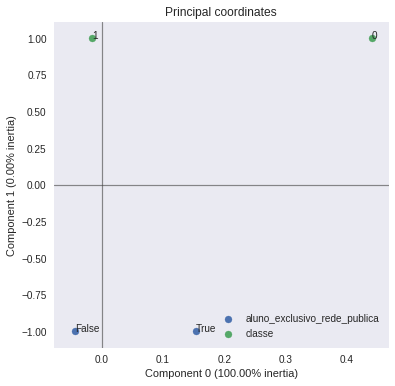

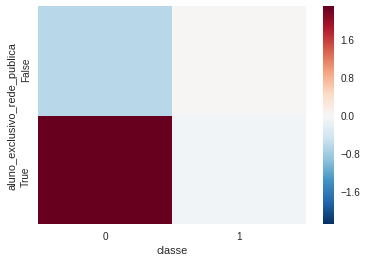

<Figure size 432x288 with 0 Axes>

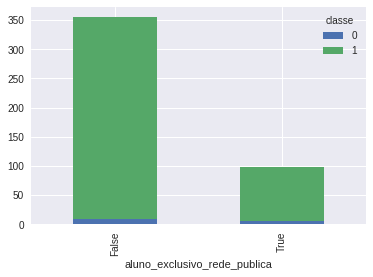

<Figure size 432x288 with 0 Axes>

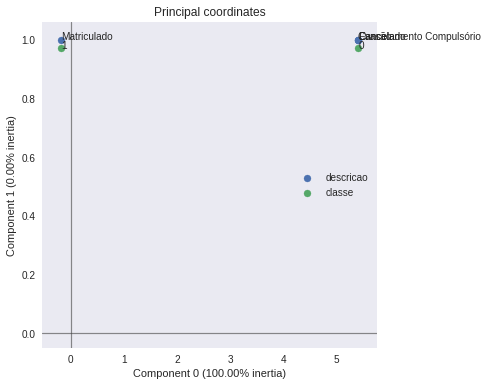

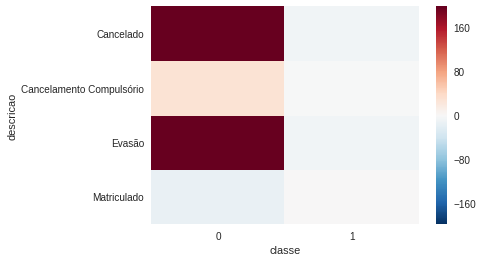

<Figure size 432x288 with 0 Axes>

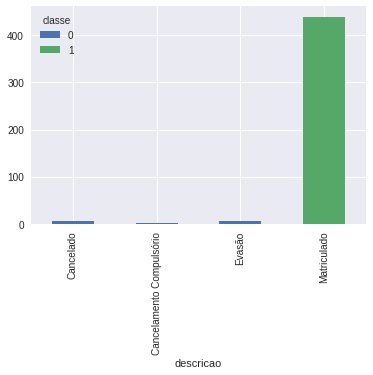

<Figure size 432x288 with 0 Axes>

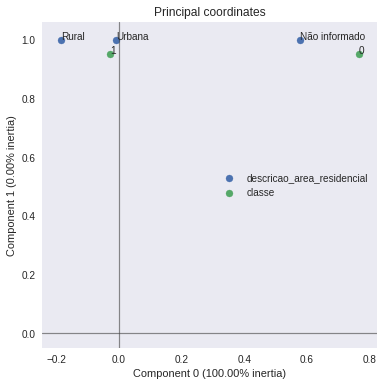

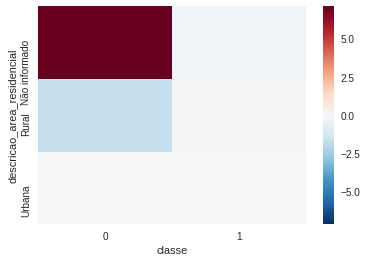

<Figure size 432x288 with 0 Axes>

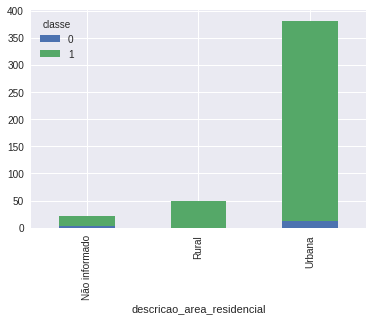

<Figure size 432x288 with 0 Axes>

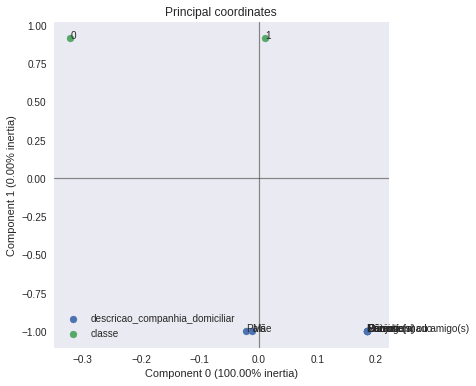

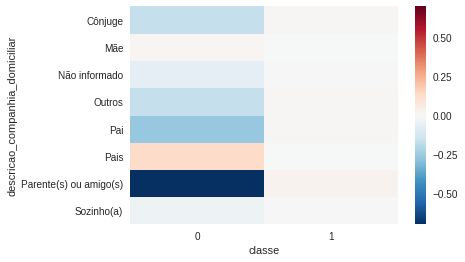

<Figure size 432x288 with 0 Axes>

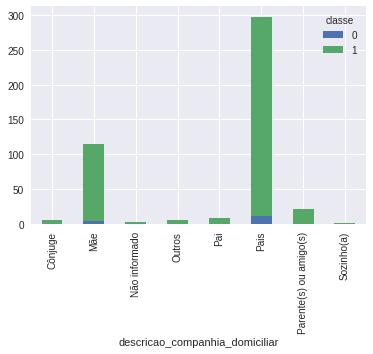

<Figure size 432x288 with 0 Axes>

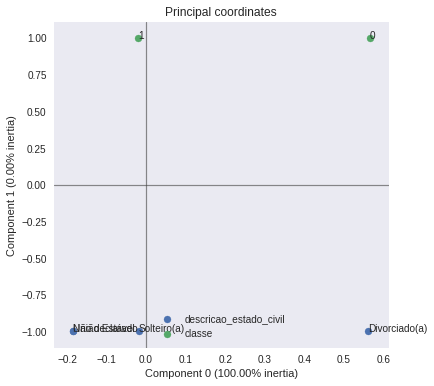

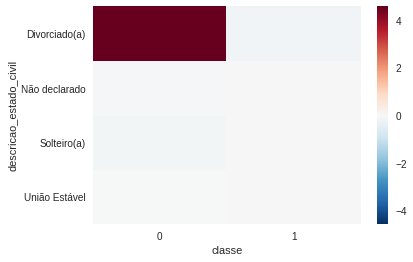

<Figure size 432x288 with 0 Axes>

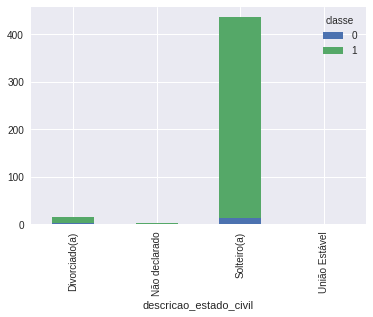

<Figure size 432x288 with 0 Axes>

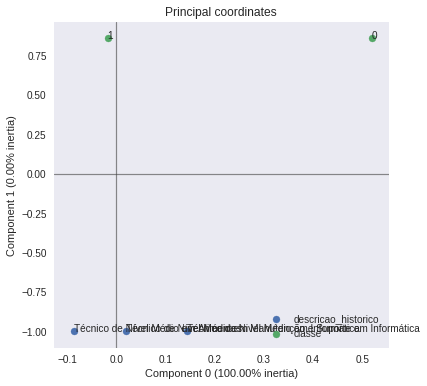

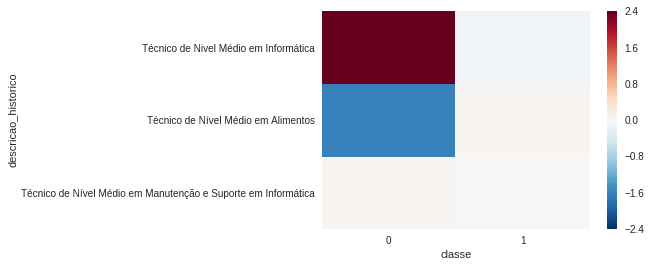

<Figure size 432x288 with 0 Axes>

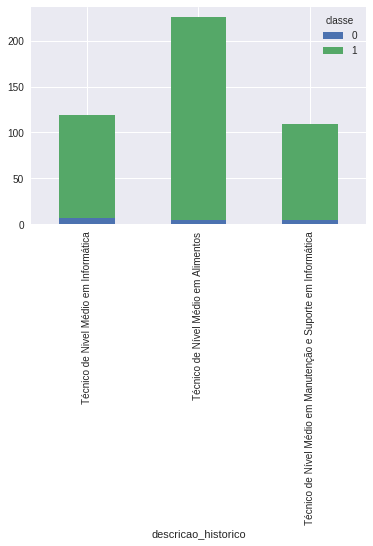

<Figure size 432x288 with 0 Axes>

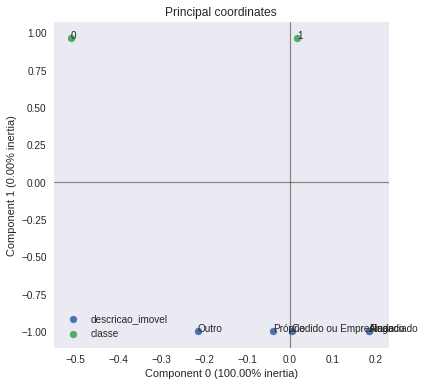

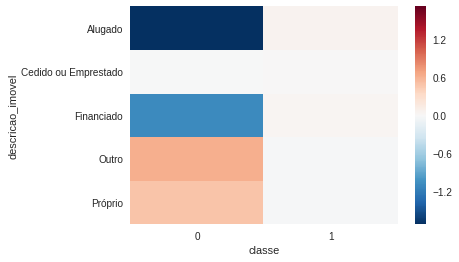

<Figure size 432x288 with 0 Axes>

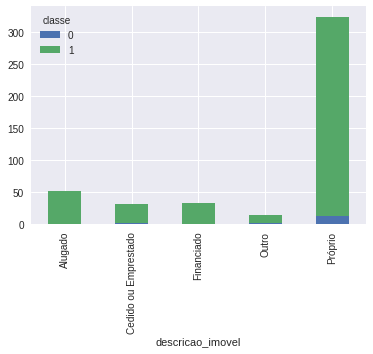

<Figure size 432x288 with 0 Axes>

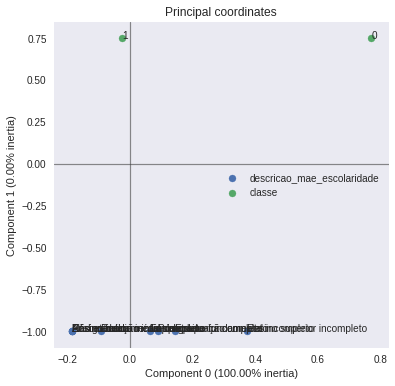

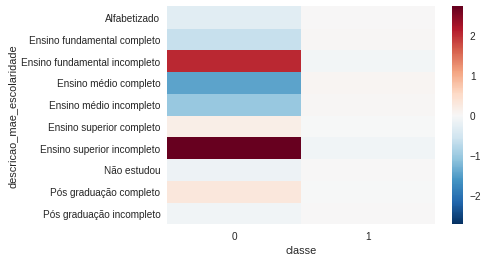

<Figure size 432x288 with 0 Axes>

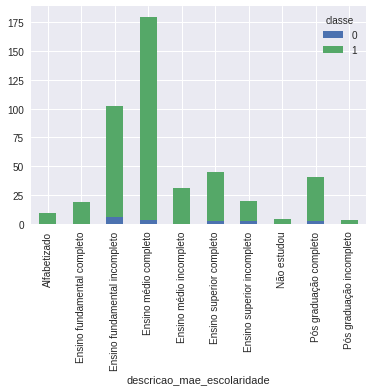

<Figure size 432x288 with 0 Axes>

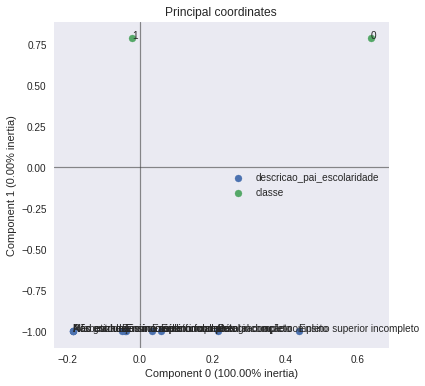

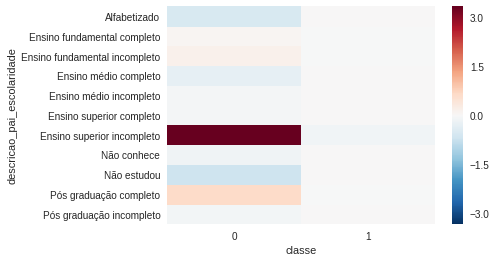

<Figure size 432x288 with 0 Axes>

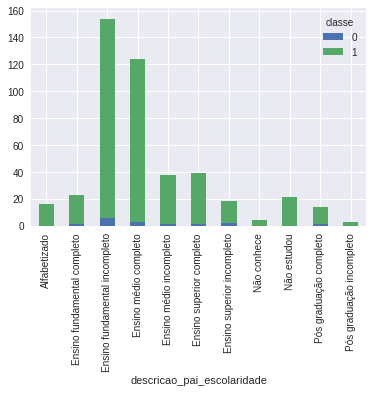

<Figure size 432x288 with 0 Axes>

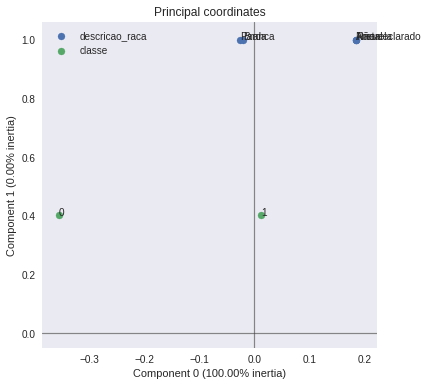

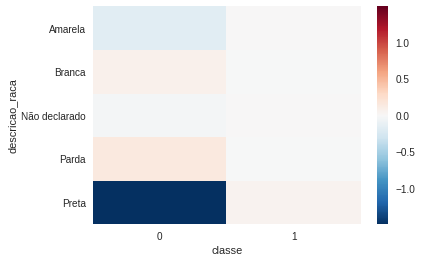

<Figure size 432x288 with 0 Axes>

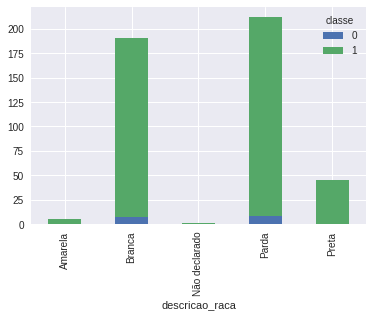

<Figure size 432x288 with 0 Axes>

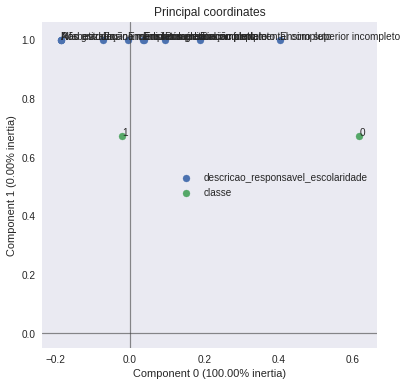

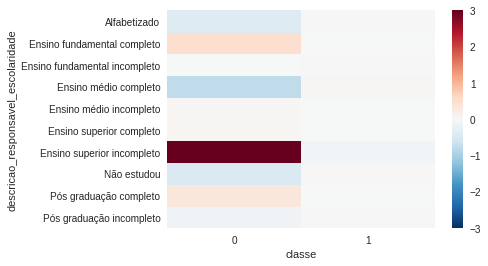

<Figure size 432x288 with 0 Axes>

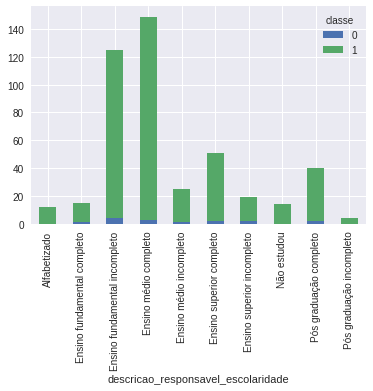

<Figure size 432x288 with 0 Axes>

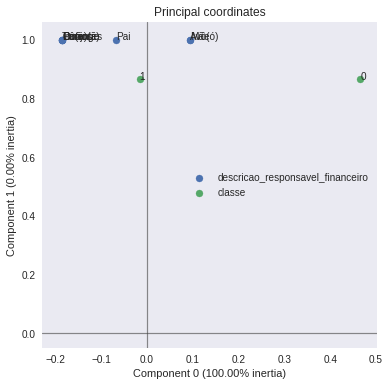

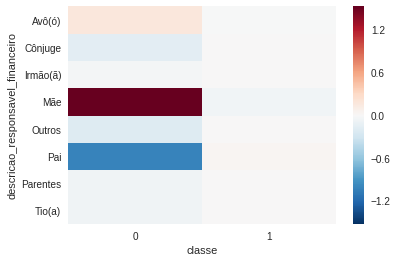

<Figure size 432x288 with 0 Axes>

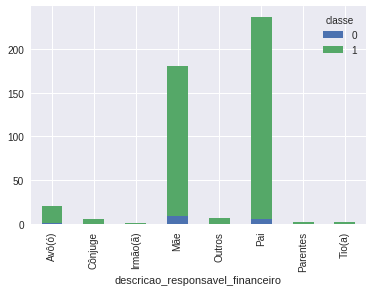

<Figure size 432x288 with 0 Axes>

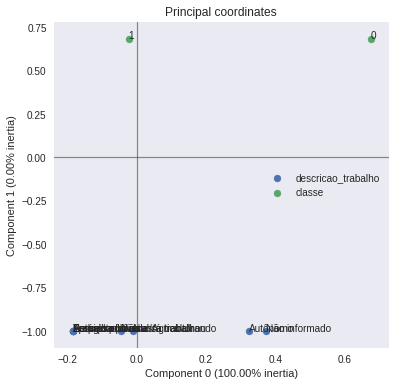

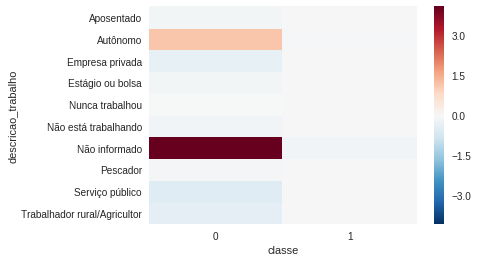

<Figure size 432x288 with 0 Axes>

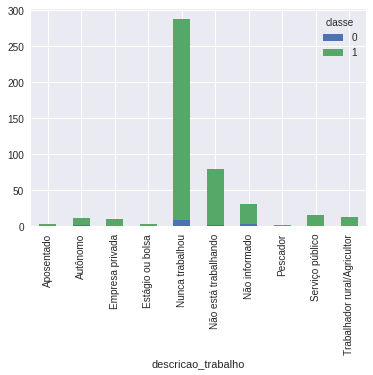

<Figure size 432x288 with 0 Axes>

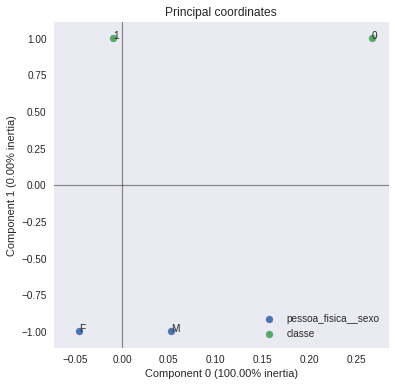

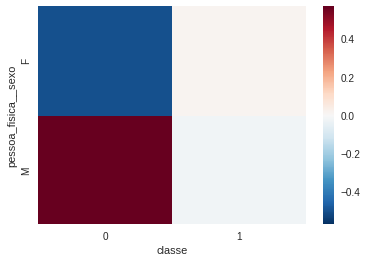

<Figure size 432x288 with 0 Axes>

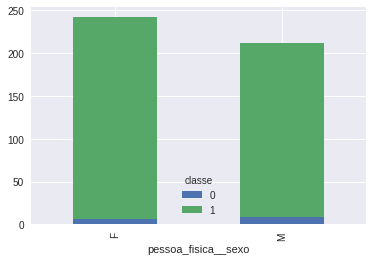

<Figure size 432x288 with 0 Axes>

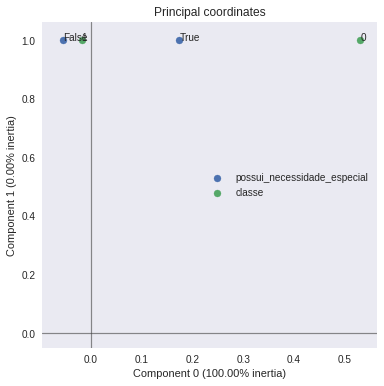

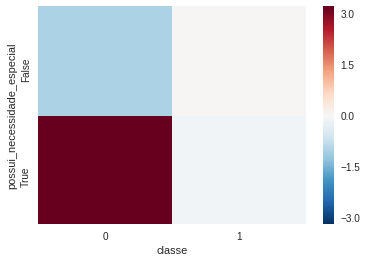

<Figure size 432x288 with 0 Axes>

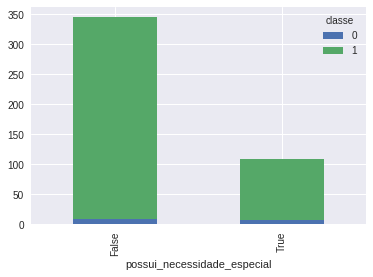

<Figure size 432x288 with 0 Axes>

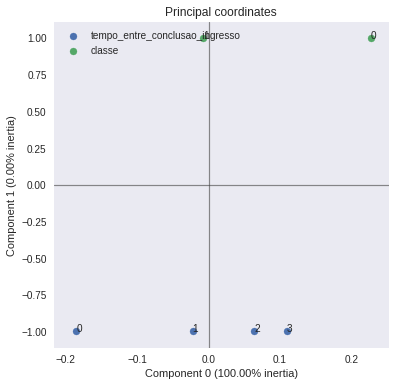

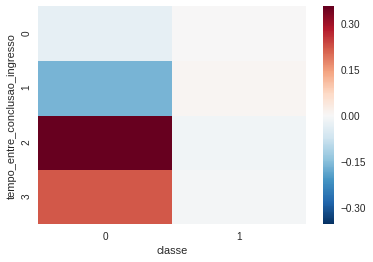

<Figure size 432x288 with 0 Axes>

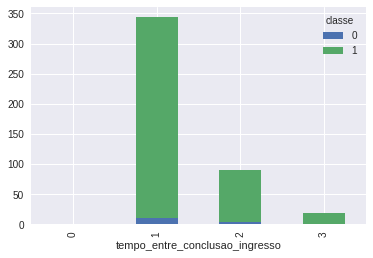

<Figure size 432x288 with 0 Axes>

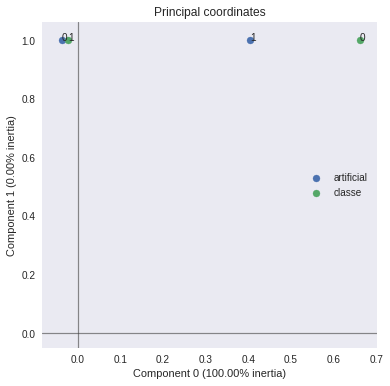

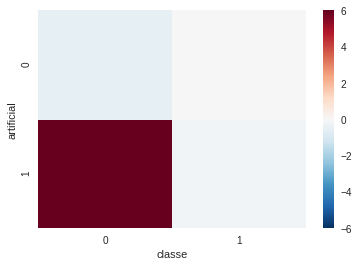

<Figure size 432x288 with 0 Axes>

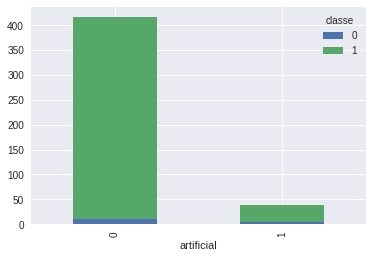

<Figure size 432x288 with 0 Axes>

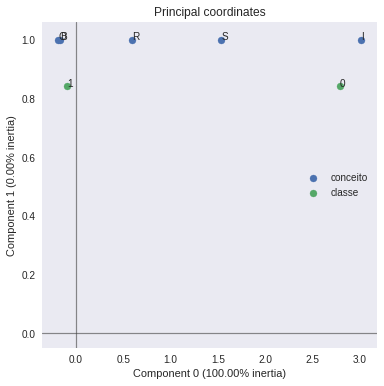

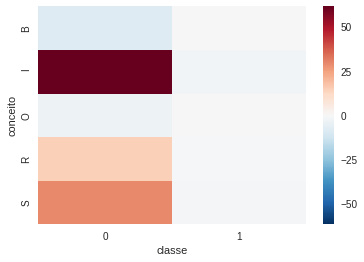

<Figure size 432x288 with 0 Axes>

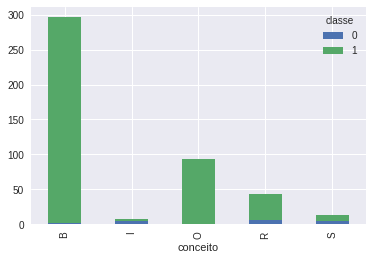

<Figure size 432x288 with 0 Axes>

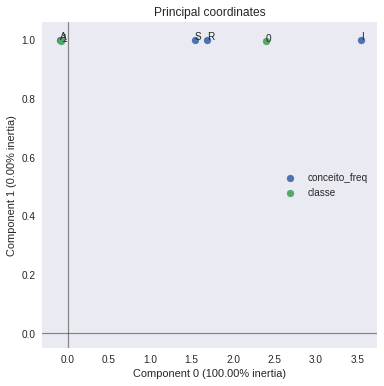

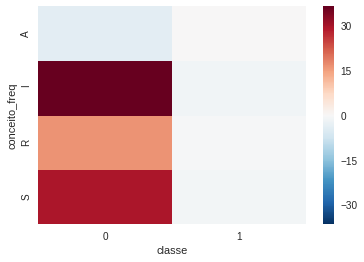

<Figure size 432x288 with 0 Axes>

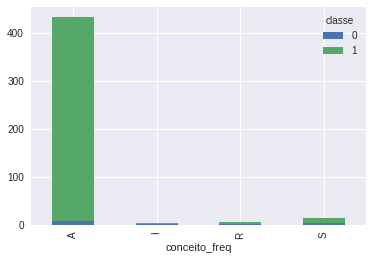

In [8]:
#https://github.com/MaxHalford/prince/blob/master/README.md#correspondence-analysis-ca 

for index1 in dados.columns:
    
  #print(index1)
  #if index1 in ['classe', 'id']:
  if index1 in ['classe', 'id', 'LnguaPortuguesaeLiteraturaI90H', 'MatemticaI120H','LnguaPortuguesaeLiteraturaI90H_dependencia', 
                'LnguaPortuguesaeLiteraturaI90H_freq', 
                'MatemticaI120H_dependencia', 'MatemticaI120H_freq', 'idade', 
                'qnt_pc', 'qtd_pessoas_domicilio', 'qnt_salarios', 'acompanhamento', 'sigla']:
      continue

  print(index1)
  print('-'*len(index1))        


  #fig = plt.figure()

  #tabela de contigencia
  tbl = pd.crosstab(index = dados[index1], columns = dados.classe)

  #tbl.columns.rename('Classe', inplace=True)
  #tbl.index.rename(index1, inplace=True)    

  #print(tbl)

  ca = prince.CA(
    n_components=2,
    n_iter=10,
    copy=True,
    check_input=True,
    engine='auto',
    random_state=42
  )    

  try:
    ca = ca.fit(tbl)
    #print("entrou aqui. fez fit")
  except MyError as e:
    print("deu erro!!!")
    #print ('My exception occurred, value: %s', e.value)
        
  fig = plt.figure()
  #fig, ax = ca.plot_rows_columns(axes=[0, 1], show_row_labels=True, show_column_labels=True)    

  print(tbl)
  
  ax = ca.plot_coordinates(
    X = tbl,
    ax = None,
    figsize = (6, 6),
    x_component = 0,
    y_component = 1,
    show_row_labels = True,
    show_col_labels = True
 )    

  #analise de correspondencia
  #ca = prince.CA(tbl, n_components=-1)
  #ca = prince.CA(tbl)


  #fig = plt.figure()
  #fig, ax = ca.plot_rows_columns(axes=[0, 1], show_row_labels=True, show_column_labels=True)

  #FOI MODIFICADO A FUNÇÃO plot_rows_columns incluído em ax.anottate o parâmetro "rotation=90" 
  #na função row_column_principal_coordinate    

  #matriz residual
  res = calc_AC(tbl)

  fig = plt.figure()
  sns.heatmap(res)

  fig = plt.figure()
  tbl.plot(kind="bar", stacked=True)  

  #break
  
    

<Figure size 432x288 with 0 Axes>

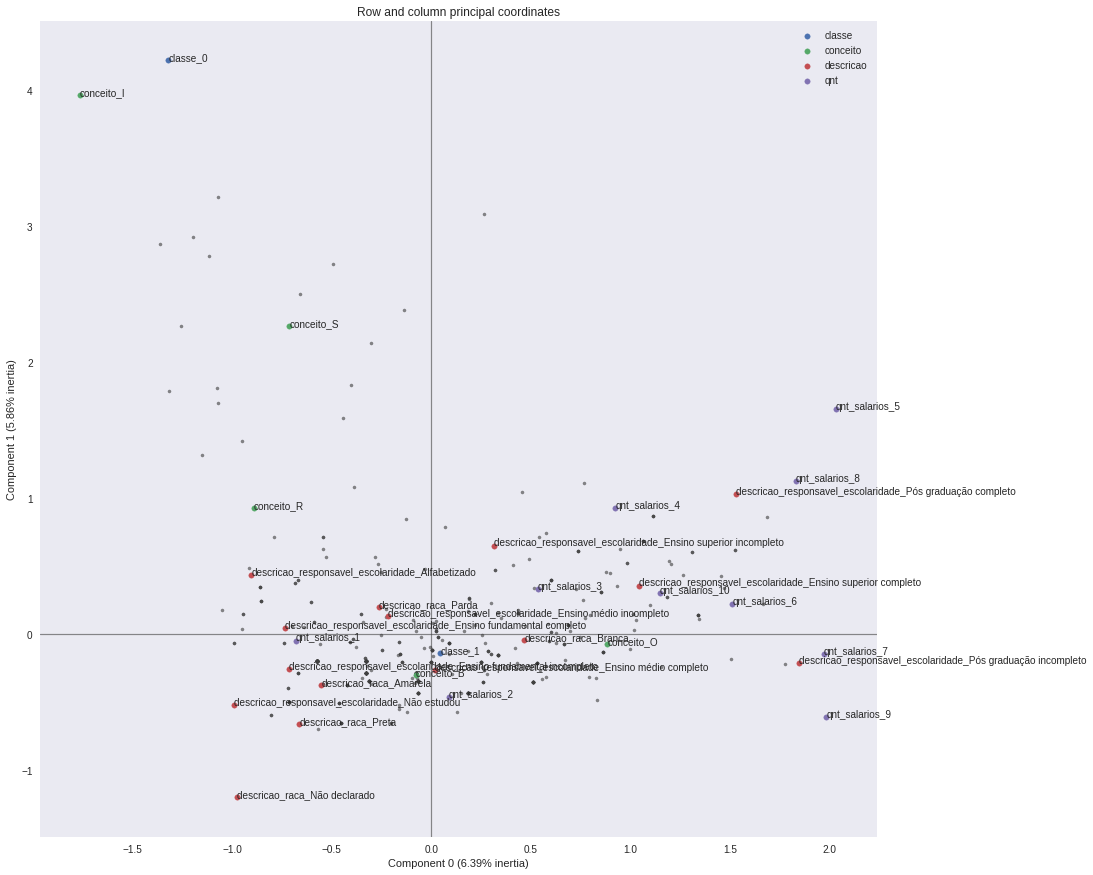

In [9]:
atributos = [
       #'LnguaPortuguesaeLiteraturaI90H',
       #'LnguaPortuguesaeLiteraturaI90H_dependencia',
       #'LnguaPortuguesaeLiteraturaI90H_freq', 'MatemticaI120H',
       #'MatemticaI120H_dependencia', 'MatemticaI120H_freq', 
       #'acompanhamento',
       #'aluno_exclusivo_rede_publica', 
       #'artificial', 
       'classe', 
       'conceito',
       #'conceito_freq', 
       #'descricao_area_residencial',
       #'descricao_companhia_domiciliar', 
       #'descricao_estado_civil',
       #'descricao_historico', 
       #'descricao_imovel', 
       #'descricao_mae_escolaridade',
       #'descricao_pai_escolaridade', 
       'descricao_raca',
       'descricao_responsavel_escolaridade',
       #'descricao_responsavel_financeiro', 
       #'descricao_trabalho', 
       #'idade',
       #'pessoa_fisica__sexo', 
       #'possui_necessidade_especial', 
       #'qnt_pc',
       'qnt_salarios', 
       #'qtd_pessoas_domicilio', 
       #'sigla',
       #'tempo_entre_conclusao_ingresso'    
]

dados_notNAN = dados[atributos]
dados_notNAN = dados_notNAN.fillna(-1)

mca = prince.MCA(
  n_components=2,
  n_iter=10,
  copy=True,
  check_input=True,
  engine='auto',
  random_state=42
)

mca = mca.fit(dados_notNAN)

fig = plt.figure()

ax = mca.plot_coordinates(
    X=dados_notNAN,
    ax=None,
    figsize=(15, 15),
    show_row_points=True,
    row_points_size=10,
    show_row_labels=False,
    show_column_points=True,
    column_points_size=30,
    show_column_labels=True,
    legend_n_cols=1
)

/usr/local/lib/python3.6/dist-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


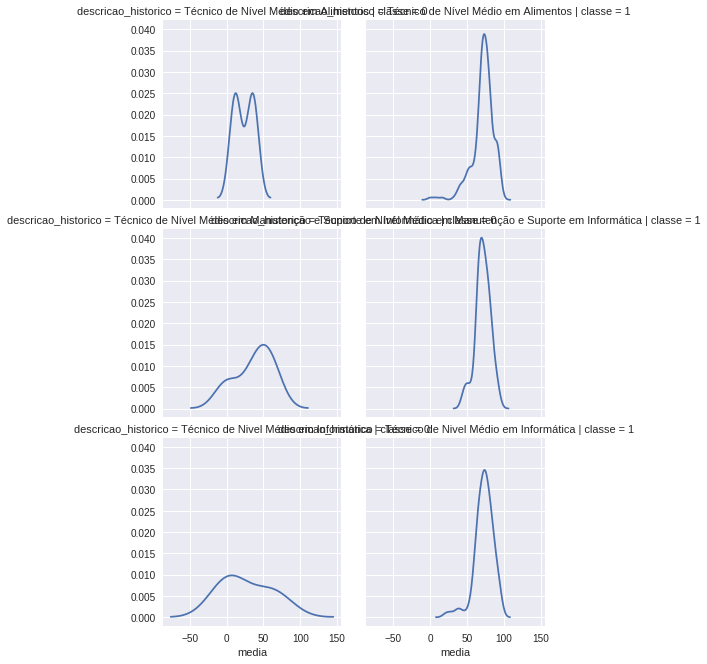

In [15]:
#outros gráficos
dados['media'] = dados[['LnguaPortuguesaeLiteraturaI90H', 'MatemticaI120H']].mean(axis=1)

g = sns.FacetGrid(dados, col="classe",  row="descricao_historico")
g = g.map(sns.kdeplot, "media")
#dados.descricao_historico

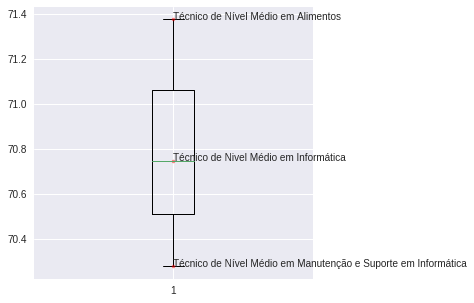

In [24]:
data_plot = [dados.groupby('descricao_historico')['media'].mean()]

fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(data_plot)
plt.plot(1, data_plot, 'r.', alpha=0.5)

for i, txt in enumerate( dados.groupby('descricao_historico')['media'].mean().index ):
    ax.annotate( txt, (1, dados.groupby('descricao_historico')['media'].mean()[i]), fontsize=10)

<Figure size 432x288 with 0 Axes>

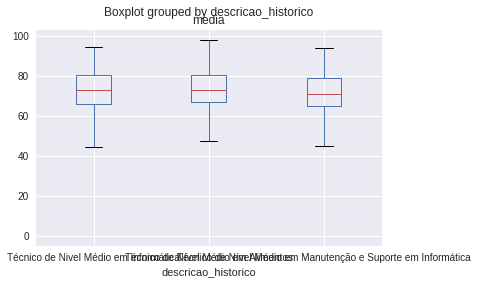

In [25]:
fig = plt.figure()
dados.boxplot(column='media',by='descricao_historico')

[0.9411764705882353, 0.9823008849557522, 0.963302752293578]


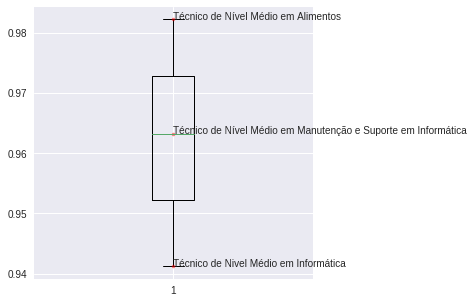

In [27]:
data_plot = []
ind = []

for index1, group1 in dados.groupby(['descricao_historico']):    
    
    qnt_alunos = dados[dados.descricao_historico == index1]['descricao_historico'].count()
    qnt_evasao = dados[(dados.descricao_historico == index1) & (dados.classe == 0)]['descricao_historico'].count()
    tx_evasao  = 1 - qnt_evasao/qnt_alunos
    
    ind.append(index1)
    data_plot.append(tx_evasao)
    
print(data_plot)

fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(data_plot)
#plt.plot([1], data_plot, 'r.', alpha=0.5)
plt.plot(np.ones(len(data_plot)), data_plot, 'r.', alpha=0.5)

for i, txt in enumerate( ind ):
    ax.annotate( txt, (1, data_plot[i]), fontsize=10)

In [30]:
dados_tunning = pd.read_json('/content/drive/My Drive/Colab Notebooks/dados/dados_flat_COM_social.json')
dados = dados_tunning.copy()
dados = dados[ dados['sigla'] == 'CN' ]
dados.shape

(463, 29)

In [32]:
dados['media'] = dados[['LnguaPortuguesaeLiteraturaI90H', 'MatemticaI120H']].mean(axis=1)
dados.groupby(['descricao', 'ano_letivo__ano'])['media'].aggregate([np.mean, np.size]).unstack()

mean                       size              
ano_letivo__ano       2015       2016     2017   2015   2016   2017
descricao                                                          
Cancelado        60.000000  27.750000      NaN    2.0    2.0    NaN
Evasão            7.833333  30.916667      NaN    3.0    6.0    NaN
Matriculado      69.554745  71.450980  68.9875  137.0  153.0  160.0

In [33]:
dados.groupby(['descricao', 'descricao_historico','ano_letivo__ano'])['media'].aggregate([np.mean, np.size]).unstack()

mean  \
ano_letivo__ano                                                      2015   
descricao   descricao_historico                                             
Cancelado   Técnico de Nivel Médio em Informática               69.000000   
            Técnico de Nível Médio em Manutenção e Suporte ...  51.000000   
Evasão      Técnico de Nivel Médio em Informática                5.000000   
            Técnico de Nível Médio em Alimentos                 13.500000   
            Técnico de Nível Médio em Manutenção e Suporte ...        NaN   
Matriculado Técnico de Nivel Médio em Informática               65.532258   
            Técnico de Nível Médio em Alimentos                 69.777778   
            Técnico de Nível Médio em Manutenção e Suporte ...  72.750000   

                                                                           \
ano_letivo__ano                                                      2016   
descricao   descricao_historico                                             
Cancelado   Técnico de Nivel Médio em Informática               27.750000   
            Técnico de Nível Médio em Manutenção e Suporte ...        NaN   
Evasão      Técnico de Nivel Médio em Informática               17.000000   
            Técnico de Nível Médio em Alimentos                 35.500000   
            Técnico de Nível Médio em Manutenção e Suporte ...  32.500000   
Matriculado Técnico de Nivel Médio em Informática               76.868421   
            Técnico de Nível Médio em Alimentos                 70.583333   
            Técnico de Nível Médio em Manutenção e Suporte ...  67.716216   

                                                                           \
ano_letivo__ano                                                      2017   
descricao   descricao_historico                                             
Cancelado   Técnico de Nivel Médio em Informática                     NaN   
            Técnico de Nível Médio em Manutenção e Suporte ...        NaN   
Evasão      Técnico de Nivel Médio em Informática                     NaN   
            Técnico de Nível Médio em Alimentos                       NaN   
            Técnico de Nível Médio em Manutenção e Suporte ...        NaN   
Matriculado Técnico de Nivel Médio em Informática               70.414634   
            Técnico de Nível Médio em Alimentos                 68.462500   
            Técnico de Nível Médio em Manutenção e Suporte ...  68.564103   

                                                                size        \
ano_letivo__ano                                                 2015  2016   
descricao   descricao_historico                                              
Cancelado   Técnico de Nivel Médio em Informática                1.0   2.0   
            Técnico de Nível Médio em Manutenção e Suporte ...   1.0   NaN   
Evasão      Técnico de Nivel Médio em Informática                2.0   1.0   
            Técnico de Nível Médio em Alimentos                  1.0   2.0   
            Técnico de Nível Médio em Manutenção e Suporte ...   NaN   3.0   
Matriculado Técnico de Nivel Médio em Informática               31.0  38.0   
            Técnico de Nível Médio em Alimentos                 72.0  78.0   
            Técnico de Nível Médio em Manutenção e Suporte ...  34.0  37.0   

                                                                      
ano_letivo__ano                                                 2017  
descricao   descricao_historico                                       
Cancelado   Técnico de Nivel Médio em Informática                NaN  
            Técnico de Nível Médio em Manutenção e Suporte ...   NaN  
Evasão      Técnico de Nivel Médio em Informática                NaN  
            Técnico de Nível Médio em Alimentos                  NaN  
            Técnico de Nível Médio em Manutenção e Suporte ...   NaN  
Matriculado Técnico de Nivel Médio em Informática               41.0  
            Técnico de Níve

In [34]:
dados.groupby(['classe', 'ano_letivo__ano'])['media'].aggregate([np.mean, np.size]).unstack()

mean                      size              
ano_letivo__ano       2015      2016     2017   2015   2016   2017
classe                                                            
0                28.700000  30.12500      NaN    5.0    8.0    NaN
1                69.554745  71.45098  68.9875  137.0  153.0  160.0

In [35]:
dados.groupby(['classe', 'descricao_historico', 'ano_letivo__ano'])['media'].aggregate([np.mean, np.size]).unstack()

mean  \
ano_letivo__ano                                                 2015   
classe descricao_historico                                             
0      Técnico de Nivel Médio em Informática               26.333333   
       Técnico de Nível Médio em Alimentos                 13.500000   
       Técnico de Nível Médio em Manutenção e Suporte ...  51.000000   
1      Técnico de Nivel Médio em Informática               65.532258   
       Técnico de Nível Médio em Alimentos                 69.777778   
       Técnico de Nível Médio em Manutenção e Suporte ...  72.750000   

                                                                      \
ano_letivo__ano                                                 2016   
classe descricao_historico                                             
0      Técnico de Nivel Médio em Informática               24.166667   
       Técnico de Nível Médio em Alimentos                 35.500000   
       Técnico de Nível Médio em Manutenção e Suporte ...  32.500000   
1      Técnico de Nivel Médio em Informática               76.868421   
       Técnico de Nível Médio em Alimentos                 70.583333   
       Técnico de Nível Médio em Manutenção e Suporte ...  67.716216   

                                                                      size  \
ano_letivo__ano                                                 2017  2015   
classe descricao_historico                                                   
0      Técnico de Nivel Médio em Informática                     NaN   3.0   
       Técnico de Nível Médio em Alimentos                       NaN   1.0   
       Técnico de Nível Médio em Manutenção e Suporte ...        NaN   1.0   
1      Técnico de Nivel Médio em Informática               70.414634  31.0   
       Técnico de Nível Médio em Alimentos                 68.462500  72.0   
       Técnico de Nível Médio em Manutenção e Suporte ...  68.564103  34.0   

                                                                       
ano_letivo__ano                                            2016  2017  
classe descricao_historico                                             
0      Técnico de Nivel Médio em Informática                3.0   NaN  
       Técnico de Nível Médio em Alimentos                  2.0   NaN  
       Técnico de Nível Médio em Manutenção e Suporte ...   3.0   NaN  
1      Técnico de Nivel Médio em Informática               38.0  41.0  
       Técnico de Nível Médio em Alimentos                 78.0  80.0  
       Técnico de Nível Médio em Manutenção e Suporte ...  37.0  39.0

In [36]:
dados.groupby(['classe', 'descricao_historico', 'descricao'])['media'].aggregate([np.mean, np.size]).unstack()

mean  \
descricao                                                 Cancelado   
classe descricao_historico                                            
0      Técnico de Nivel Médio em Informática                   41.5   
       Técnico de Nível Médio em Alimentos                      NaN   
       Técnico de Nível Médio em Manutenção e Suporte ...      51.0   
1      Técnico de Nivel Médio em Informática                    NaN   
       Técnico de Nível Médio em Alimentos                      NaN   
       Técnico de Nível Médio em Manutenção e Suporte ...       NaN   

                                                                      \
descricao                                                     Evasão   
classe descricao_historico                                             
0      Técnico de Nivel Médio em Informática                9.000000   
       Técnico de Nível Médio em Alimentos                 28.166667   
       Técnico de Nível Médio em Manutenção e Suporte ...  32.500000   
1      Técnico de Nivel Médio em Informática                     NaN   
       Técnico de Nível Médio em Alimentos                       NaN   
       Técnico de Nível Médio em Manutenção e Suporte ...        NaN   

                                                                       \
descricao                                                 Matriculado   
classe descricao_historico                                              
0      Técnico de Nivel Médio em Informática                      NaN   
       Técnico de Nível Médio em Alimentos                        NaN   
       Técnico de Nível Médio em Manutenção e Suporte ...         NaN   
1      Técnico de Nivel Médio em Informática                71.268182   
       Técnico de Nível Médio em Alimentos                  69.593478   
       Técnico de Nível Médio em Manutenção e Suporte ...   69.572727   

                                                               size         \
descricao                                                 Cancelado Evasão   
classe descricao_historico                                                   
0      Técnico de Nivel Médio em Informática                    3.0    3.0   
       Técnico de Nível Médio em Alimentos                      NaN    3.0   
       Técnico de Nível Médio em Manutenção e Suporte ...       1.0    3.0   
1      Técnico de Nivel Médio em Informática                    NaN    NaN   
       Técnico de Nível Médio em Alimentos                      NaN    NaN   
       Técnico de Nível Médio em Manutenção e Suporte ...       NaN    NaN   

                                                                       
descricao                                                 Matriculado  
classe descricao_historico                                             
0      Técnico de Nivel Médio em Informática                      NaN  
       Técnico de Nível Médio em Alimentos                        NaN  
       Técnico de Nível Médio em Manutenção e Suporte ...         NaN  
1      Técnico de Nivel Médio em Informática                    110.0  
       Técnico de Nível Médio em Alimentos                      230.0  
       Técnico de Nível Médio em Manutenção e Suporte ...       110.0

In [0]:
#ABAIXO CODIGO DA ANTIGA LIB DO PRINCE

In [0]:
"""
#biblioteca antiga do prince

for index1 in dados.columns:
    
    #print(index1)
    if index1 in ['classe', 'id']:
        continue

    print(index1)
    print('-'*len(index1))        
        
    fig = plt.figure()

    #tabela de contigencia
    tbl = pd.crosstab(index = dados[index1], columns = dados.classe)

    #analise de correspondencia
    ca = prince.CA(tbl, n_components=-1)
    #ca = prince.CA(tbl)

    fig = plt.figure()
    fig, ax = ca.plot_rows_columns(axes=[0, 1], show_row_labels=True, show_column_labels=True)
    
    #FOI MODIFICADO A FUNÇÃO plot_rows_columns incluído em ax.anottate o parâmetro "rotation=90" 
    #na função row_column_principal_coordinate    
    
    #matriz residual
    res = calc_AC(tbl)
       
    fig = plt.figure()
    sns.heatmap(res)
    
    fig = plt.figure()
    tbl.plot(kind="bar", stacked=True)  
"""    


'\n#biblioteca antiga do prince\n\nfor index1 in dados.columns:\n    \n    #print(index1)\n    if index1 in [\'classe\', \'id\']:\n        continue\n\n    print(index1)\n    print(\'-\'*len(index1))        \n        \n    fig = plt.figure()\n\n    #tabela de contigencia\n    tbl = pd.crosstab(index = dados[index1], columns = dados.classe)\n\n    #analise de correspondencia\n    ca = prince.CA(tbl, n_components=-1)\n    #ca = prince.CA(tbl)\n\n    fig = plt.figure()\n    fig, ax = ca.plot_rows_columns(axes=[0, 1], show_row_labels=True, show_column_labels=True)\n    \n    #FOI MODIFICADO A FUNÇÃO plot_rows_columns incluído em ax.anottate o parâmetro "rotation=90" \n    #na função row_column_principal_coordinate    \n    \n    #matriz residual\n    res = calc_AC(tbl)\n       \n    fig = plt.figure()\n    sns.heatmap(res)\n    \n    fig = plt.figure()\n    tbl.plot(kind="bar", stacked=True)  \n'